In [11]:
library("raster")
library('dplyr')
library("ggplot2")

In [12]:
base_dir = '/Volumes/ksankaran/Sen12MS'
scene_indices = read.csv("scene_indices.csv")

In [14]:
season_dir = function(season,base_dir = '/Volumes/ksankaran/Sen12MS'){
  if(season=='spring'){
    return(paste0(base_dir,'/','ROIs1158_spring'))
  }else if(season == 'summer'){
    return(paste0(base_dir,'/','ROIs1868_summer'))
  }else if(season == 'fall'){
    return(paste0(base_dir,'/','ROIs1970_fall'))
  }else if(season == 'winter'){
    return(paste0(base_dir,'/','ROIs2017_winter'))
  }else{return(NA)}
}

In [15]:
# Get coordinates from one patch ####
coords_patch = function(filename){
  x <- stack(filename)
  wgs84 = "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
  x_ <- projectExtent(x, crs=wgs84)
  
  # get the center location, to plug into google maps
  e <- extent(x_)
  long = (e@xmin + e@xmax) / 2
  lat = (e@ymin + e@ymax) / 2
  return(c(long,lat))
}

In [16]:
# Get coordinates from one scene by averaging coordinates of patches ####
# dat = c('lc', 's1', 's2'), since .tif files in lc is smaller,
# we'll use 'lc' as default.

# season = c('spring','summer','fall','winter')
# scene_id is the index of one scene, which corresponds to the names of the folders containing a bunch of patches.
coords_scene = function(season, 
                        scene_id,
                        dat = 'lc'){
  folder = paste0(season_dir(season),'/',dat,'_',scene_id)
  files = list.files(folder) # all .tif file names in the specific folder (season, scene)
                             # e.g., 'ROIs1970_fall_lc_149_p30.tif'
  
  files = sample(files, 5)
  y = sapply(files, function(x){
    x = paste0(folder,'/',x) # the directory of one .tif file
    return(coords_patch(x))
  }) %>% unlist()
  
  y = matrix(y,ncol = 2,byrow = TRUE) # reshape the output so that two colunums represent
                                      # longtitude and latitude, respectively
  cat(season,'-',scene_id,' done.\n', sep = '')
  return(apply(y, 2, mean))
}


In [17]:
# Get coordinates of all scenes in a season ####

coords_season = function(s){
  scene_ids = filter(scene_indices,season==s) %>% .[,2]
  df = data.frame(season = rep(s,length(scene_ids)),
                  scene_id =scene_ids )
  coords = sapply(scene_ids, 
                  function(ind){
                    y = coords_scene(season= s,scene_id = ind)
                    return(y)})
  df = cbind(df,matrix(coords,  ncol = 2,byrow = TRUE)) 
  names(df)[c(2,3)] = c("longitude",'latitude')
  return(df)
}


In [18]:
spring = coords_season('spring') 
summer = coords_season('summer')
fall = coords_season('fall')
winter = coords_season('winter')

spring-1 done.
spring-6 done.
spring-8 done.
spring-9 done.
spring-15 done.
spring-17 done.
spring-21 done.
spring-24 done.
spring-26 done.
spring-31 done.
spring-39 done.
spring-40 done.
spring-41 done.
spring-44 done.
spring-45 done.
spring-53 done.
spring-58 done.
spring-63 done.
spring-66 done.
spring-71 done.
spring-75 done.
spring-77 done.
spring-83 done.
spring-97 done.
spring-100 done.
spring-101 done.
spring-103 done.
spring-106 done.
spring-109 done.
spring-110 done.
spring-112 done.
spring-113 done.
spring-115 done.
spring-117 done.
spring-119 done.
spring-120 done.
spring-121 done.
spring-122 done.
spring-123 done.
spring-124 done.
spring-126 done.
spring-127 done.
spring-128 done.
spring-131 done.
spring-132 done.
spring-134 done.
spring-138 done.
spring-140 done.
spring-141 done.
spring-142 done.
spring-143 done.
spring-144 done.
spring-145 done.
spring-146 done.
spring-147 done.
spring-148 done.
summer-4 done.
summer-7 done.
summer-8 done.
summer-11 done.
summer-14 done.

In [19]:
# join 4 dataframes.
df = rbind(spring,summer,fall,winter)
df$id = 1:252
#write.csv(df,' f')

K-means clustering with 7 clusters of sizes 49, 25, 33, 32, 34, 60, 19

Cluster means:
    latitude          2
1  130.16803  19.198151
2 -115.15859  45.306350
3   55.66537  37.646084
4  -82.29126  38.902168
5   25.48435  -6.577868
6    7.51413  42.073539
7  -57.38411 -18.862356

Clustering vector:
  [1] 5 6 1 5 1 7 2 2 2 7 5 7 5 7 5 6 5 4 6 2 5 5 4 5 1 1 5 2 4 4 6 4 1 1 1 6 6
 [38] 4 6 1 3 3 6 1 1 3 5 6 1 4 1 6 6 6 6 6 3 2 6 5 2 7 6 5 3 2 3 7 1 1 2 4 3 2
 [75] 1 5 1 6 5 2 3 1 1 2 6 1 6 2 7 2 3 4 3 3 6 4 6 1 1 3 6 1 7 6 2 6 1 1 3 1 6
[112] 4 1 7 6 6 3 6 3 7 6 2 6 6 6 5 4 3 5 6 6 4 4 3 2 5 1 5 4 5 5 5 7 5 2 7 1 1
[149] 1 3 4 3 6 5 2 6 6 3 2 5 5 2 3 3 7 1 5 6 1 1 6 6 4 6 1 4 3 7 4 1 7 6 4 3 1
[186] 4 1 6 3 4 4 7 6 1 1 3 1 1 6 4 6 4 1 3 4 6 6 5 5 1 2 5 5 3 1 5 7 7 4 6 5 6
[223] 7 2 3 6 3 5 6 4 6 6 4 1 6 1 6 3 4 1 3 1 4 1 2 3 6 2 4 6 6 6

Within cluster sum of squares by cluster:
[1] 53476.562  6662.285 13604.801  4416.000 10220.075 13019.353  5482.724
 (between_SS / total_SS =  93.9 %)

Av

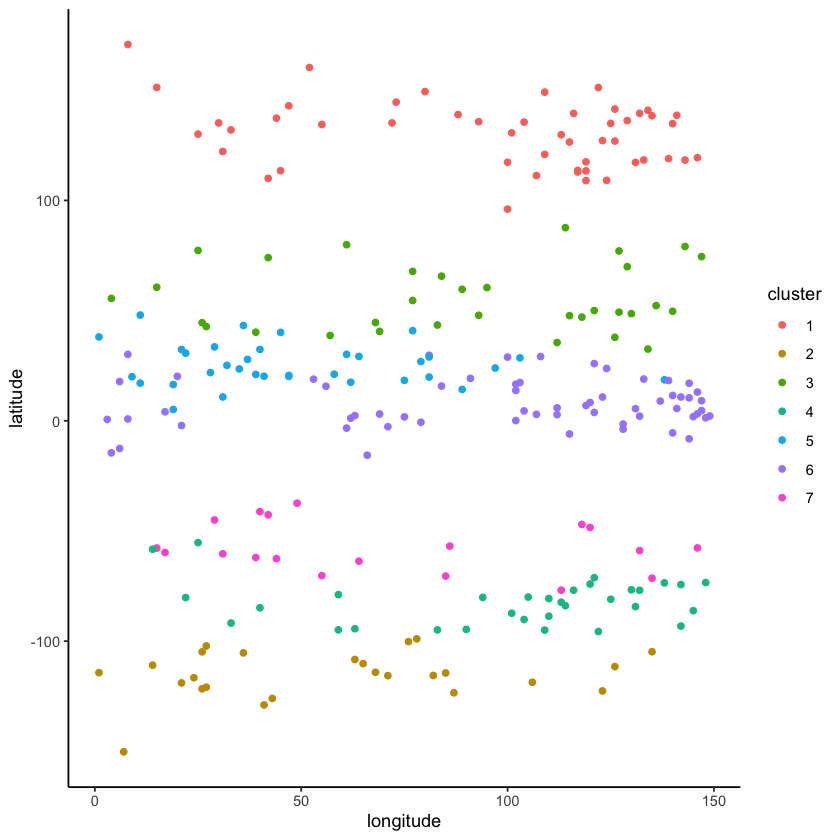

In [20]:
(cluster = kmeans(df[,c(3,4)],7,iter.max = 10, nstart = 1))
df %>% mutate(cluster = as.factor(cluster$cluster)) %>%
  ggplot()+
  geom_point(aes(x = longitude, y = latitude, 
                 color = cluster))+
  theme_classic()

K-means clustering with 8 clusters of sizes 49, 60, 32, 19, 15, 33, 34, 10

Cluster means:
    latitude          2
1  130.16803  19.198151
2    7.51413  42.073539
3  -82.29126  38.902168
4  -57.38411 -18.862356
5 -111.24322  36.877916
6   55.66537  37.646084
7   25.48435  -6.577868
8 -121.03165  57.949000

Clustering vector:
  [1] 7 2 1 7 1 4 8 8 8 4 7 4 7 4 7 2 7 3 2 5 7 7 3 7 1 1 7 5 3 3 2 3 1 1 1 2 2
 [38] 3 2 1 6 6 2 1 1 6 7 2 1 3 1 2 2 2 2 2 6 8 2 7 5 4 2 7 6 8 6 4 1 1 5 3 6 8
 [75] 1 7 1 2 7 5 6 1 1 5 2 1 2 5 4 8 6 3 6 6 2 3 2 1 1 6 2 1 4 2 5 2 1 1 6 1 2
[112] 3 1 4 2 2 6 2 6 4 2 5 2 2 2 7 3 6 7 2 2 3 3 6 8 7 1 7 3 7 7 7 4 7 8 4 1 1
[149] 1 6 3 6 2 7 5 2 2 6 8 7 7 5 6 6 4 1 7 2 1 1 2 2 3 2 1 3 6 4 3 1 4 2 3 6 1
[186] 3 1 2 6 3 3 4 2 1 1 6 1 1 2 3 2 3 1 6 3 2 2 7 7 1 5 7 7 6 1 7 4 4 3 2 7 2
[223] 4 5 6 2 6 7 2 3 2 2 3 1 2 1 2 6 3 1 6 1 3 1 5 6 2 5 3 2 2 2

Within cluster sum of squares by cluster:
[1] 53476.562 13019.353  4416.000  5482.724  1135.918 13604.801 10220.075
[8]  2287.

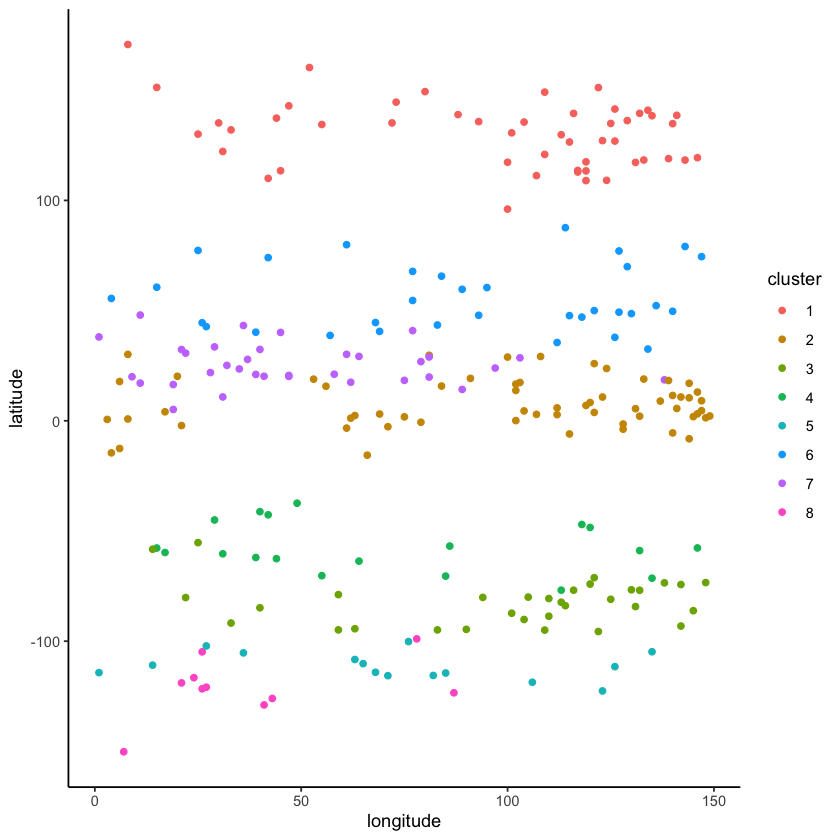

In [21]:
(cluster = kmeans(df[,c(3,4)],8,iter.max = 10, nstart = 1))
df %>% mutate(cluster = as.factor(cluster$cluster)) %>%
  ggplot()+
  geom_point(aes(x = longitude, y = latitude, 
                 color = cluster))+
  theme_classic()